In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
import pathlib

In [141]:
data_path='data'
data=pathlib.Path(data_path)

In [142]:
image_count = len(list(data.glob('*/*.jpg')))
print(image_count)

7553


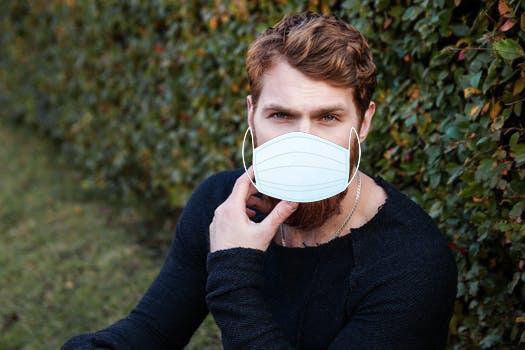

In [143]:
mask = list(data.glob('with_mask/*'))
PIL.Image.open(str(mask[0]))

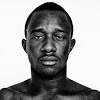

In [144]:
no_mask = list(data.glob('without_mask/*'))
PIL.Image.open(str(no_mask[0]))

In [145]:
class_name=['Mask:)','Without_mask:(']

In [146]:
import cv2
from random import shuffle
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split


In [147]:
Data=os.listdir(data_path)

In [76]:
images=[]
labels=[]
img_rows=112
img_cols=112
for category in Data:
    folder_path=os.path.join(data,category)
    for img in os.listdir(folder_path):
        img_path=os.path.join(folder_path,img)
        img=cv2.imread(img_path)
        grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        resized_img=cv2.resize(grayscale_img,(img_rows,img_cols))
        images.append(resized_img)
        labels.append(category)
images=np.array(images)/255.0
images=np.reshape(images,(images.shape[0],img_rows,img_cols,1))
    

In [77]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)
labels=np.array(labels)
(X_train,X_test,y_train,y_test)=train_test_split(images,labels,test_size=0.25,random_state=0)

In [78]:
X_train[0]

array([[[0.89803922],
        [0.88627451],
        [0.87058824],
        ...,
        [0.85882353],
        [0.8627451 ],
        [0.85490196]],

       [[0.8627451 ],
        [0.84705882],
        [0.83529412],
        ...,
        [0.85098039],
        [0.8627451 ],
        [0.85490196]],

       [[0.82352941],
        [0.81176471],
        [0.8       ],
        ...,
        [0.84705882],
        [0.85490196],
        [0.85098039]],

       ...,

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]]])

In [79]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [80]:
num_classes=2

In [81]:
model=Sequential([
    layers.Conv2D(64, (3,3), padding='same', activation='relu',input_shape=(img_rows,img_cols,1)),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])

In [117]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [83]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 112, 112, 64)      640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 16)        18448     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)             

In [84]:
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [85]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50


C:\Users\kumar\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:5016: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


177/177 [==============================] - 153s 846ms/step - loss: 0.6425 - accuracy: 0.6331
Epoch 2/50
177/177 [==============================] - 151s 853ms/step - loss: 0.5608 - accuracy: 0.7165
Epoch 3/50
177/177 [==============================] - 156s 882ms/step - loss: 0.4775 - accuracy: 0.7767
Epoch 4/50
177/177 [==============================] - 117s 659ms/step - loss: 0.3765 - accuracy: 0.8353
Epoch 5/50
177/177 [==============================] - 95s 536ms/step - loss: 0.3005 - accuracy: 0.8754
Epoch 6/50
177/177 [==============================] - 96s 543ms/step - loss: 0.2462 - accuracy: 0.9017
Epoch 7/50
177/177 [==============================] - 100s 564ms/step - loss: 0.2162 - accuracy: 0.9094
Epoch 8/50
177/177 [==============================] - 98s 553ms/step - loss: 0.1920 - accuracy: 0.9244
Epoch 9/50
177/177 [==============================] - 97s 546ms/step - loss: 0.1697 - accuracy: 0.9347
Epoch 10/50
177/177 [==============================] - 97s 549ms/step - loss: 0

In [86]:
predictions = model.predict(X_test)
score = tf.nn.softmax(predictions[6])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Without_mask:( with a 73.11 percent confidence.


In [87]:
score=(tf.nn.softmax(predictions))

In [104]:
y_classes=[np.argmax(i)for i in score]
y_classes

[0]

In [131]:
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath)

In [138]:
cam = cv2.VideoCapture(0)
cam.set(4, 480) # set video widht
cam.set(4, 480) # set video height
font = cv2.FONT_HERSHEY_SIMPLEX
count=1
while True:
    ret, img =cam.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale( 
        gray,
        scaleFactor = 1.2,
        minNeighbors = 5,
        minSize = (50,50),
       )
    for(x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
        count+=1
        grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        resized_img=cv2.resize(grayscale_img,(img_rows,img_cols))
        test1=[]
        test1.append(np.array(resized_img))
        x_test=np.array([i for i in test1])
        x_test=np.reshape(x_test,(x_test.shape[0],img_rows,img_cols,1))
        prediction= model.predict(x_test)
        score = tf.nn.softmax(prediction)
        confidence=np.max(score)*100
        name=class_name[np.argmax(score)]
        if confidence<0:
            name='Unknown'
        cv2.putText(
                    img, 
                    str(name), 
                    (x+5,y-5), 
                    font, 
                    1, 
                    (255,255,255), 
                    2
                   )
        cv2.putText(
                    img, 
                    str(confidence), 
                    (x+5,y+h-5), 
                    font, 
                    1, 
                    (255,255,0), 
                    1
                   )
        
        
    cv2.imshow('camera',img) 
    k = cv2.waitKey(10) & 0xff # Press 'ESC' for exiting video
    if k == 27:
        break
# Do a bit of cleanup
print("\n [INFO] Exiting Program and cleanup stuff")
cam.release()
cv2.destroyAllWindows()

(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)

 [INFO] Exiting Program and cleanup stuff


In [148]:
y_test.shape

(1889, 2)

In [100]:
X_test[0].shape

(112, 112, 1)

In [105]:
len(X_test)

1889

In [106]:
pred = model.predict(X_test)

In [115]:
score=(tf.nn.softmax(pred))
print(score)

tf.Tensor(
[[0.7310586  0.26894143]
 [0.26894143 0.7310586 ]
 [0.7310586  0.26894143]
 ...
 [0.7310586  0.26894143]
 [0.7310586  0.26894143]
 [0.27027822 0.7297218 ]], shape=(1889, 2), dtype=float32)


In [ ]:
y_class=[np.argmax(i)for i in score]
y_class

0

In [114]:
X_test[0]

array([[[0.97647059],
        [0.96470588],
        [0.97254902],
        ...,
        [0.98039216],
        [0.98431373],
        [0.97254902]],

       [[0.94117647],
        [0.97254902],
        [0.95294118],
        ...,
        [0.95294118],
        [0.96470588],
        [0.92941176]],

       [[0.94509804],
        [0.91372549],
        [0.96470588],
        ...,
        [0.93333333],
        [0.98823529],
        [0.95294118]],

       ...,

       [[0.89019608],
        [0.96078431],
        [0.91372549],
        ...,
        [0.25882353],
        [0.3254902 ],
        [0.42745098]],

       [[0.97647059],
        [0.97647059],
        [0.98039216],
        ...,
        [0.78431373],
        [0.81176471],
        [0.77647059]],

       [[0.96470588],
        [0.95294118],
        [0.95294118],
        ...,
        [0.98039216],
        [0.96078431],
        [0.96862745]]])

In [139]:
cam = cv2.VideoCapture(0)
cam.set(4, 480) # set video widht
cam.set(4, 480) # set video height
count=1
while True:
    ret, img =cam.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale( 
        gray,
        scaleFactor = 1.2,
        minNeighbors = 5,
        minSize = (50,50),
       )
    for(x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
        count+=1
        grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        resized_img=cv2.resize(grayscale_img,(img_rows,img_cols))
        count+=1
        cv2.imwrite('test.jpg',resized_img)
        
        
    cv2.imshow('camera',img) 
    k = cv2.waitKey(30) & 0xff
    if k == 27: # press 'ESC' to quit
        break
    elif count>=2:
        break
# Do a bit of cleanup
print("\n [INFO] Exiting Program and cleanup stuff")
cam.release()
cv2.destroyAllWindows()


 [INFO] Exiting Program and cleanup stuff


In [136]:
test_img=cv2.imread('test.jpg')
grayscale_img=cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
print(grayscale_img.shape)

(112, 112)


In [137]:
resized_img1=cv2.resize(grayscale_img,(img_rows,img_cols))
print(resized_img1.shape)
test1=[]
test1.append(np.array(resized_img1))
x1_test=np.array([i for i in test1])
x1_test=np.reshape(x1_test,(x1_test.shape[0],img_rows,img_cols,1))
prediction1= model.predict(x1_test)
score1 = tf.nn.softmax(prediction1)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score1)], 100 * np.max(score1))
)

(112, 112)
This image most likely belongs to Without_mask:( with a 73.11 percent confidence.
